In [129]:
import pickle
import time
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [130]:
file ="missing_value_imputer_.pkl"
with open(file,'rb') as file:
    iterative_imputer = pickle.load(file)

In [131]:
file ="robust_transform.pkl"
with open(file,'rb') as file:
    robust_scalling = pickle.load(file)

In [132]:
file = "best_model.pkl"
with open(file,'rb') as file:
    best_model = pickle.load(file)

In [133]:
df=pd.read_csv('Kaggle_Training_Dataset_v2.csv')

C:\Users\amiya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [134]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")

    
    
    plt.subplot(1, 1,1)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [135]:
def function1(X):
 
    # replacing -99 by NaN in perf_6_month_avg and perf_12_month_avg column
    X.perf_6_month_avg.replace({-99.0 : np.nan},inplace=True)
    X.perf_12_month_avg.replace({-99.0 : np.nan},inplace=True)
 
    # Converting  Yes and No to 0 and 1 respectively (one hot encoding for categorical features)
    categorical_features = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
    for col in categorical_features:
        X[col].replace({'Yes':1,'No':0},inplace=True)
        X[col]=X[col].astype(int)
 
    # iteraive Imputation (for missing value imputation)
    X_array=X.to_numpy()

    X_array =iterative_imputer.transform(X_array)
    

    
    # robust scalling on Data 

    X_array_robust_scalled = robust_scalling .transform(X_array)
    

    
    predicted_y=best_model.predict(X_array_robust_scalled)
    
    labled_predicted_y=[]
    
    #Coverting ml output to bussiness output
    for each in predicted_y:
        if each==0:
            labled_predicted_y.append("No")
        else:
            labled_predicted_y.append("Yes")
    
    return labled_predicted_y

In [136]:
x = df.head(5)
target_feature = x['went_on_backorder']
x = x.drop(['sku','went_on_backorder'],axis=1)
y_hat = function1(x)
print(" Predicted y after modelling: ",y_hat)
print("Time taken for execution is  found to be {}".format((time.time() - start_time)))

Predicted y after modelling:  ['No', 'No', 'No', 'No', 'No']
Time taken for execution is 31.155861377716064


In [137]:
def function2(X,Y):
 
    # replacing -99 by NaN in perf_6_month_avg and perf_12_month_avg column
    X.perf_6_month_avg.replace({-99.0 : np.nan},inplace=True)
    X.perf_12_month_avg.replace({-99.0 : np.nan},inplace=True)
 
    # Converting  Yes and No to 0 and 1 respectively (one hot encoding for categorical features)
    categorical_features = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
    for col in categorical_features:
        X[col].replace({'Yes':1,'No':0},inplace=True)
        X[col]=X[col].astype(int)
        
    # one-hot encoding for target feature
    Y.replace({'Yes':1,'No':0},inplace=True)
    Y.astype(int)
 
    # iteraive Imputation (missing value imputation)
    X_array=X.to_numpy()

    X_array =iterative_imputer.transform(X_array)
    
    
    # robust scalling on Data 

    X_array_robust_scalled = robust_scalling .transform(X_array)
    
    #prediction using best model
    
    predicted_y=best_model.predict(X_array_robust_scalled)
    
    print("Macro F1-Score after applying best model on test data is : " , f1_score(Y,predicted_y,pos_label =1,average="micro"))
    
    plot_confusion_matrix(Y,predicted_y)    
    
    

    


C:\Users\amiya\anaconda3\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Macro F1-Score after applying best model on test data is :  0.9092142857142858


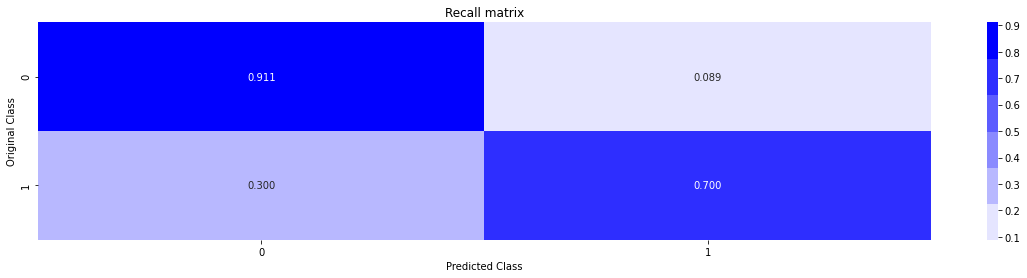

Time Taken for execution is 4.243344068527222


In [138]:
small_data = df.head(14000)
target_feature = small_data['went_on_backorder']
small_data = small_data.drop(['sku','went_on_backorder'],axis=1)
start_time = time.time()
function2(small_data,target_feature)
print("Time Taken for execution is {}".format((time.time() - start_time)))